# Decision Tree for Regression

Create a regression tree using sklearn for a data set with one feature

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import tree
from sklearn import metrics
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
# Define the features (X) and the target (y)
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1)  # Dropping non-numerical columns
y = df['median_house_value']


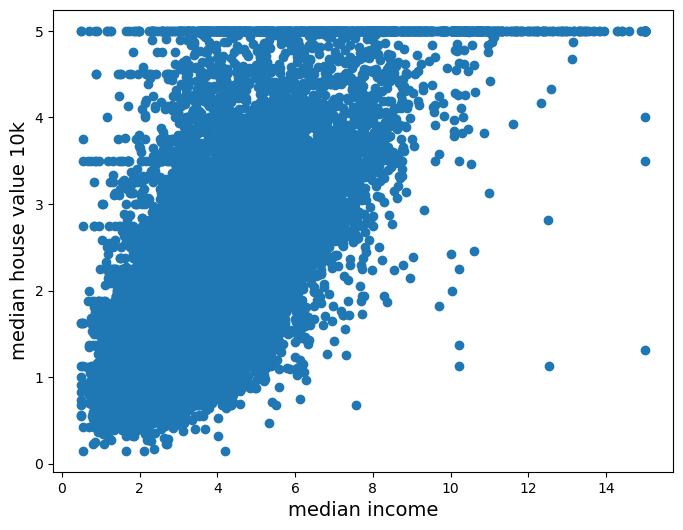

In [5]:
plt.figure(figsize=(8, 6))

plt.scatter(df['median_income'], df['median_house_value'] / 100000)
plt.xlabel('median income', fontsize=14)
plt.ylabel('median house value 10k', fontsize=14);

## Check if there's missing value for selected variables

In [4]:
# Check for missing values in each column of X
missing_values_in_X = X.isnull().sum()

print(missing_values_in_X)

if missing_values_in_X.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64
There are missing values in the dataset.


In [5]:
X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].median())

In [6]:
# Check for missing values in each column of X
missing_values_in_X = X.isnull().sum()

print(missing_values_in_X)

if missing_values_in_X.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64
No missing values in the dataset.


##  Doing train and test split

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(16512, 8)

In [11]:
# Instantiate a Regression Tree from sklarn and fit it on the data set

regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## Inspect evaluation measures such as MAE, MSE, or RMSE.

### For training data

In [12]:
# Mean Squared Error (MSE) for training data
mse_train = metrics.mean_squared_error(y_train, regressor.predict(X_train))
print(f"Training Mean Squared Error (MSE): {mse_train}")

# Mean Absolute Error (MAE) for training data
mae_train = metrics.mean_absolute_error(y_train, regressor.predict(X_train))
print(f"Training Mean Absolute Error (MAE): {mae_train}")

# Root Mean Squared Error (RMSE) for training data
rmse_train = np.sqrt(mse_train)
print(f"Training Root Mean Squared Error (RMSE): {rmse_train}")

Training Mean Squared Error (MSE): 0.0
Training Mean Absolute Error (MAE): 0.0
Training Root Mean Squared Error (RMSE): 0.0


### For test data

In [13]:
mse_test = metrics.mean_squared_error(y_test, regressor.predict(X_test))
print(f"Test Mean Squared Error (MSE): {mse_test}")

# Mean Absolute Error (MAE) for test data
mae_test = metrics.mean_absolute_error(y_test, regressor.predict(X_test))
print(f"Test Mean Absolute Error (MAE): {mae_test}")

# Root Mean Squared Error (RMSE) for test data
rmse_test = np.sqrt(mse_test)
print(f"Test Root Mean Squared Error (RMSE): {rmse_test}")

Test Mean Squared Error (MSE): 4912533896.265504
Test Mean Absolute Error (MAE): 44267.70445736434
Test Root Mean Squared Error (RMSE): 70089.47065191393


### Given the wide range in house prices, RMSE is often more commonly used in regression problems like this because it emphasizes larger errors. However, MAE provides a clearer interpretation in terms of absolute dollars, so it depends on the goals of your model.

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(regressor,
               filled=True, 
               rounded=True,
               fontsize=14);


# Modify the tree hyper-parameters (such as criterion, max depth, min samples split, and min samples leaf) to increase the quality of the prediction. You might plot graphs showing error for different values of these parameters.

### Experiment with different criterion

Criterion: squared_error
Train MSE: 2432324175.379059
Test MSE: 3862202282.713479

Criterion: absolute_error
Train MSE: 2687204938.4658127
Test MSE: 3567445038.86852



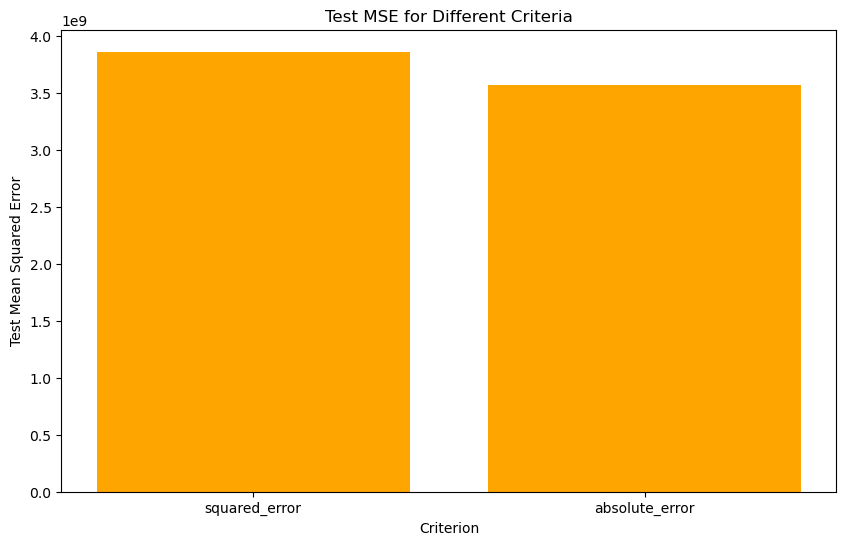

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the possible criteria
criteria = ['squared_error', 'absolute_error',]

# Lists to store performance metrics for each criterion
train_errors = []
test_errors = []

# Loop over each criterion
for criterion in criteria:
    # Initialize the DecisionTreeRegressor with the current criterion
    regressor = tree.DecisionTreeRegressor(criterion=criterion, random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=5)
    
    # Train the model
    regressor.fit(X_train, y_train)
    
    # Predictions on the training and test sets
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # Calculate the MSE for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append errors to the lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Print the results
    print(f"Criterion: {criterion}")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}\n")

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(criteria, test_errors, color='orange')
plt.title('Test MSE for Different Criteria')
plt.xlabel('Criterion')
plt.ylabel('Test Mean Squared Error')
plt.show()


### From observation,using criterion of "abosolute value " make the test error smaller 

### Experiment with hyperparameters max_depth

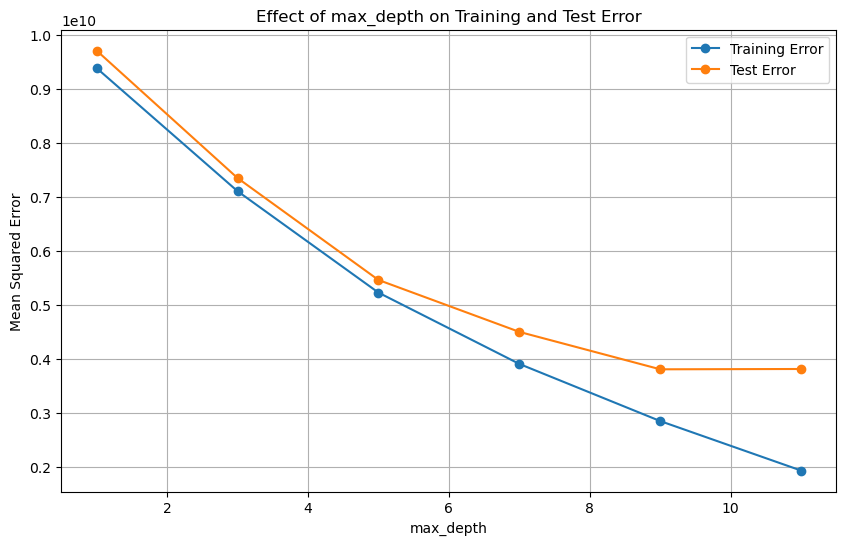

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize lists to store results
depths = range(1, 12,2)
train_errors = []
test_errors = []

# Loop over different values for `max_depth`
for max_depth in depths:
    regressor = tree.DecisionTreeRegressor(criterion= 'absolute_error', max_depth=max_depth, random_state=42)
    regressor.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # Calculate the Mean Squared Error (MSE) for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append the errors to the lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, label='Training Error', marker='o')
plt.plot(depths, test_errors, label='Test Error', marker='o')
plt.title('Effect of max_depth on Training and Test Error')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


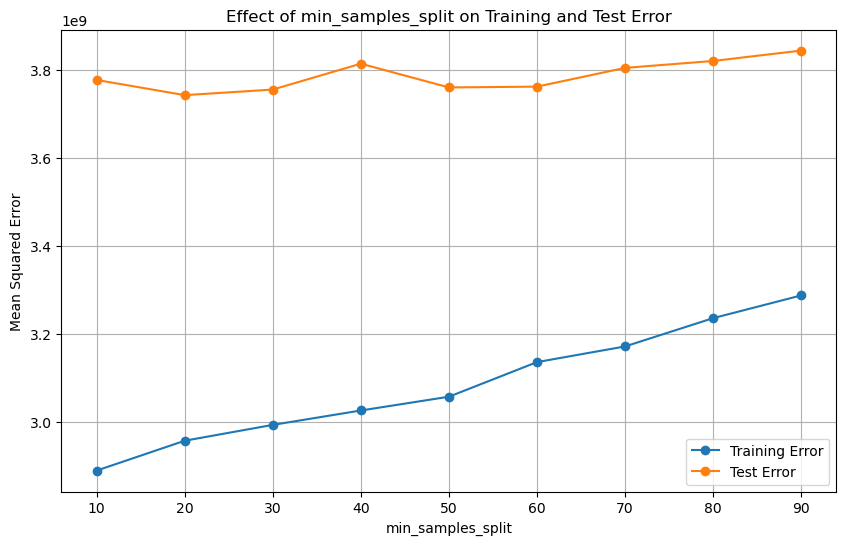

In [18]:
splits = range(10, 100, 10)
train_errors = []
test_errors = []

# Loop over different values for `min_samples_split`
for min_split in splits:
    regressor = tree.DecisionTreeRegressor(criterion= 'absolute_error',min_samples_split=min_split, max_depth= 9 , random_state=42)
    regressor.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # Calculate the MSE for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append the errors to the lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(splits, train_errors, label='Training Error', marker='o')
plt.plot(splits, test_errors, label='Test Error', marker='o')
plt.title('Effect of min_samples_split on Training and Test Error')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


### Experiment with hyperparamters min samples leaf

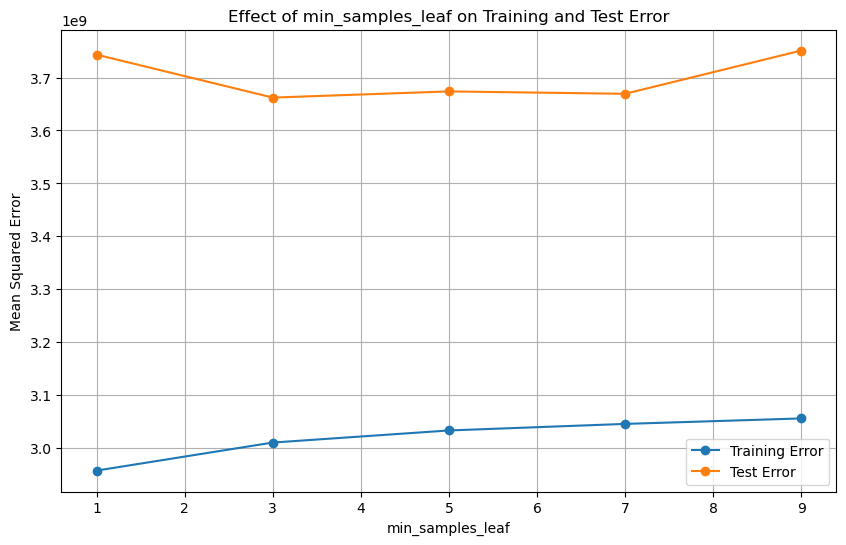

In [20]:
leaves = range(1, 10,2 )
train_errors = []
test_errors = []

# Loop over different values for `min_samples_leaf`
for min_leaf in leaves:
    regressor = tree.DecisionTreeRegressor(criterion= 'absolute_error',min_samples_leaf=min_leaf, min_samples_split= 20, max_depth=9, random_state=42)
    regressor.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # Calculate the MSE for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append the errors to the lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(leaves, train_errors, label='Training Error', marker='o')
plt.plot(leaves, test_errors, label='Test Error', marker='o')
plt.title('Effect of min_samples_leaf on Training and Test Error')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


## Use GridSearchCV() to find the best model.


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the hyperparameter distribution
param_grid = {
    'criterion': ['absolute_error'],  # Use fewer criteria
    'max_depth': [10, 15],           # Narrow the range for max_depth
    'min_samples_split': [5, 10],    # Narrow the values for min_samples_split
    'min_samples_leaf': [5, 10]      # Narrow the values for min_samples_leaf
}
# Initialize the DecisionTreeRegressor
regressor = tree. DecisionTreeRegressor(random_state=42)

# Instantiate the GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                          cv=5, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator (model with the best parameters)
best_model = grid_search.best_estimator_

# Get the best parameters and best score (RMSE)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate MSE
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

# Evaluate MAE
test_mae = mean_absolute_error(y_test, y_test_pred)

# Evaluate RMSE (convert MSE to RMSE)
test_rmse = np.sqrt(test_mse)

# Print the evaluation metrics

print(f"Best MSE: {test_mse}")
print(f"Best MAE: {test_mae}")
print(f"Best RMSE: {test_rmse}")



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'criterion': 'absolute_error', 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best MSE: 3406256637.801175
Best MAE: 36691.73776647287
Best RMSE: 58363.14451604861


##  Use RandomizedSearchCV to find the best model

In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter distribution
param_dist = {
     'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [5, 10, 15,20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}

# Instantiate the randomized search
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist, 
                                   scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42, verbose=1)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
# Get the best parameters and best score (RMSE)
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate MSE
test_mse = mean_squared_error(y_test, y_test_pred)

# Evaluate RMSE (convert MSE to RMSE)
test_rmse = np.sqrt(test_mse)

# Evaluate MAE
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Best RMSE: {test_rmse}")
print(f"Best MSE: {test_mse}")
print(f"Best MAE: {test_mae}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 15, 'max_depth': 15, 'criterion': 'absolute_error'}
Best RMSE: 58311.769210655446
Best MSE: 3400262428.476744
Best MAE: 36750.145833333336


## Using pruning to reduce overfitting

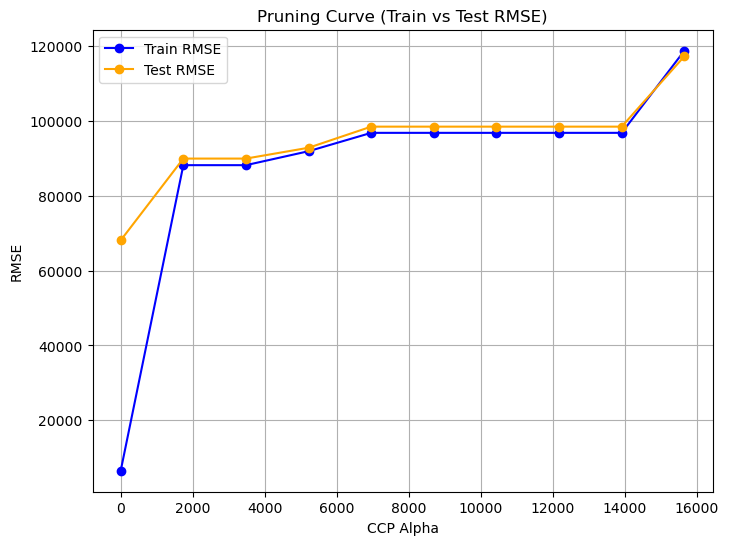

Best CCP Alpha: 0.0


In [14]:


from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Instantiate a decision tree regressor with 'absolute_error' criterion
regressor = tree.DecisionTreeRegressor(
    criterion='absolute_error',
    random_state=42
)

# Get the cost complexity pruning path (ccp_alphas is the parameter for pruning)
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Generate 10 evenly spaced values of ccp_alpha, ensuring the minimum is 0
ccp_alphas = np.linspace(0, max(ccp_alphas), num=10)

# Initialize lists to store the train and test RMSE scores
train_rmse_scores = []
test_rmse_scores = []

# Loop over different values of ccp_alpha and train models to find the best one
for ccp_alpha in ccp_alphas:
    # Set the current ccp_alpha value
    regressor.set_params(ccp_alpha=ccp_alpha)

    # Fit the model to the training data
    regressor.fit(X_train, y_train)
    
    # Predict on the training and test sets
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # Calculate RMSE for training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Calculate RMSE (square root of MSE)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    # Append RMSE scores
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

# Plot train and test RMSE scores to find the best pruning parameter
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, train_rmse_scores, label="Train RMSE", marker='o', color="blue")
plt.plot(ccp_alphas, test_rmse_scores, label="Test RMSE", marker='o', color="orange")
plt.xlabel("CCP Alpha")
plt.ylabel("RMSE")
plt.title("Pruning Curve (Train vs Test RMSE)")
plt.legend()
plt.grid(True)
plt.show()

# Identify the best alpha that balances train and test performance (lowest test RMSE)
best_ccp_alpha = ccp_alphas[np.argmin(test_rmse_scores)]
print(f"Best CCP Alpha: {best_ccp_alpha}")



#  Determine which features are the most important in your model.

Feature Importances:
median_income: 0.4939
latitude: 0.2197
longitude: 0.2169
housing_median_age: 0.0379
total_rooms: 0.0110
population: 0.0108
total_bedrooms: 0.0060
households: 0.0038


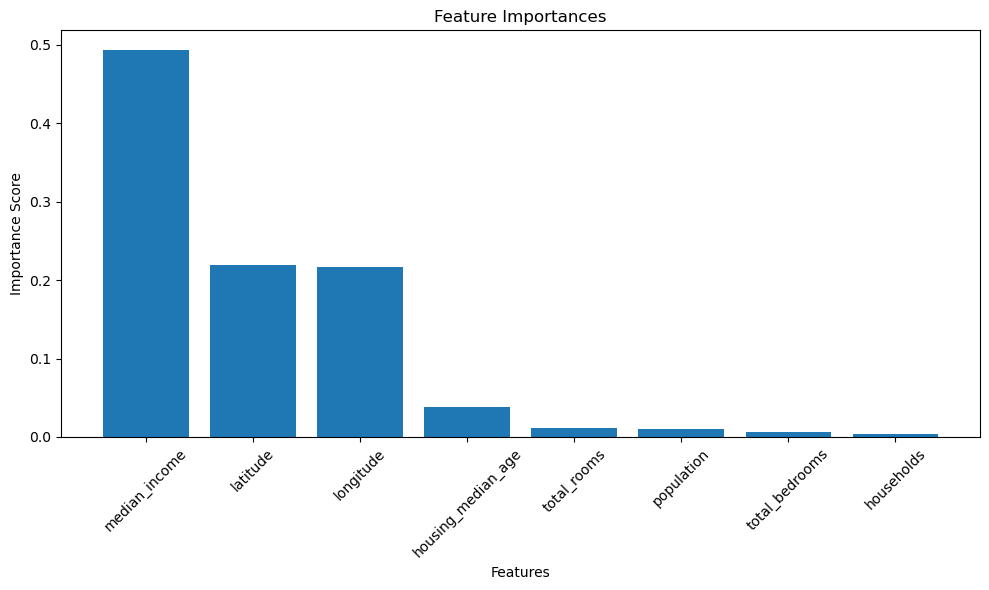

In [18]:
# Best parameters from your search
best_params = {
    'min_samples_split': 15,
    'min_samples_leaf': 15,
    'max_depth': 15,
    'criterion': 'absolute_error'
}

# Initialize the DecisionTreeRegressor with the best parameters
regressor = tree. DecisionTreeRegressor(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42  # Ensures reproducibility
)

# Fit the regressor to your training data
regressor.fit(X_train, y_train)


# Get the feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Get feature importances from the trained decision tree model
feature_importances = regressor.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the feature importance values
print("Feature Importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")

# Plot feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()



# Take some values for the explanatory variables and use your model to predict the median house value.

In [23]:


means = X_train.mean()
stds = X_train.std()

# Number of new data points to generate
n_samples = 10

# Generate unseen data by sampling from the normal distribution of each feature
new_data = np.random.normal(loc=means, scale=stds, size=(n_samples, X_train.shape[1]))

# Convert the new data into a DataFrame (with the same column names as X_train)
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)
print("Generated Unseen Data :")
# Print the generated unseen data
print(new_data_df)
# Use the trained regressor to make predictions on the generated unseen data
predictions = regressor.predict(new_data_df)

# Print the predictions for the unseen data
print("\nPredictions of median house value for the Unseen Data:")
print(predictions)



Generated Unseen Data :
    longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -118.605923  32.065654           17.405848  2692.623025      564.691470   
1 -119.061601  33.279165           52.898345  1194.438949      320.541388   
2 -117.742663  37.386231           14.769269  3165.460099      234.665075   
3 -119.254320  36.453302           31.827241  5518.008967        5.419103   
4 -116.844717  34.556482           45.853288  7738.367678      527.914784   
5 -124.963112  36.171689           28.828384  -295.976347      974.542958   
6 -121.860497  36.765265           18.177054  4520.487392     -201.241749   
7 -120.121577  35.725210           27.076882  5111.259703      786.094546   
8 -115.434025  38.762071           50.845408  2367.894682      528.481779   
9 -122.481320  34.063856           32.209674  5699.268157      435.451197   

    population  households  median_income  
0   -17.530205  932.596521       4.105573  
1  1694.358022  986.484656       3.17782